# # Real-Estate House Price Predictation using Navie_bayes classification and K-fold cross validatataion :

# ---------------------------------------------------------------------------------------------------------------

# # Exploratory Data Analysis (EDA).

In [1]:
import numpy as np                           # Importing Numpy important python library 
import pandas as pd                         # Importing Pandas library for EDA Purpose
import matplotlib.pyplot as plt 
import seaborn as sns                      # Importing Seaborn for Ploting graphs.

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv("dataset_ori.csv")    # Fetching Dataset using python Library.
df.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1790,2,2,2,East,114300
1,2,2030,4,2,3,East,114200
2,3,1740,3,2,1,East,114800
3,4,1980,3,2,3,East,94700
4,5,2130,3,3,3,East,119800


# ---------------------------------------------------------------------------------------------------------------

## # Shape Of Dataset..

In [3]:
df.shape

(467, 7)

# ---------------------------------------------------------------------------------------------------------------

## # Explore Continues Features.

In [4]:
df.describe()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Price
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,234.000000,2023.832976,3.021413,2.498929,2.599572,132572.591006
std,134.955548,210.089083,0.705262,0.525630,1.040097,27144.107920
min,1.000000,1450.000000,2.000000,2.000000,1.000000,69100.000000
25%,117.500000,1910.000000,3.000000,2.000000,2.000000,111600.000000
50%,234.000000,2020.000000,3.000000,2.000000,3.000000,127700.000000
75%,350.500000,2150.000000,3.000000,3.000000,3.000000,150200.000000
max,467.000000,2590.000000,5.000000,4.000000,6.000000,211200.000000


# ---------------------------------------------------------------------------------------------------------------

## # Inorder to understand Data Types Of Entire Data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          467 non-null    int64 
 1   SqFt          467 non-null    int64 
 2   Bedrooms      467 non-null    int64 
 3   Bathrooms     467 non-null    int64 
 4   Offers        467 non-null    int64 
 5   Neighborhood  467 non-null    object
 6   Price         467 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 25.7+ KB


# ---------------------------------------------------------------------------------------------------------------

## # Null data Check in Database.


In [6]:
df.isnull().sum()     # inorder to check missing value in dataset

Home            0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Neighborhood    0
Price           0
dtype: int64

#### ----} Here, Dataset has no null values.

# ---------------------------------------------------------------------------------------------------------------

## # Duplicate Data Check in DataBase.

In [7]:
df.duplicated().sum()      # Provides total number of duplicate data in database.

0

#### ----} Here, Dataset has no Duplicate data.

# ---------------------------------------------------------------------------------------------------------------

## # Outliers Check and Handling. 

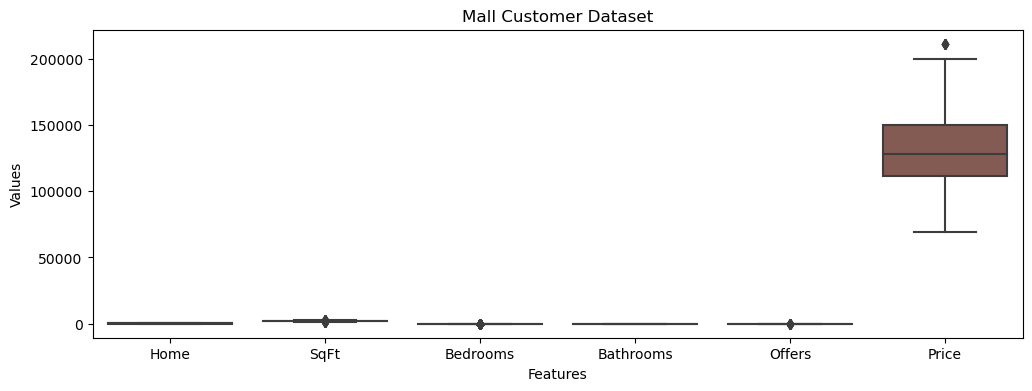

In [8]:
# Create a box plot of all features using Seaborn.

plt.figure(figsize = (12,4))          # Sets plot size.

sns.boxplot(data = df)

# Title of Dataset. 
plt.title('Mall Customer Dataset')

plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot.
plt.show()

#### ----} Here, it can be observe that outliers in Mall Customer dataset is not present. 

# ---------------------------------------------------------------------------------------------------------------

## # Implementing Correlation Heat Map.

Text(0.5, 1.0, 'Heat Map of Wholesale Distribution Dataset')

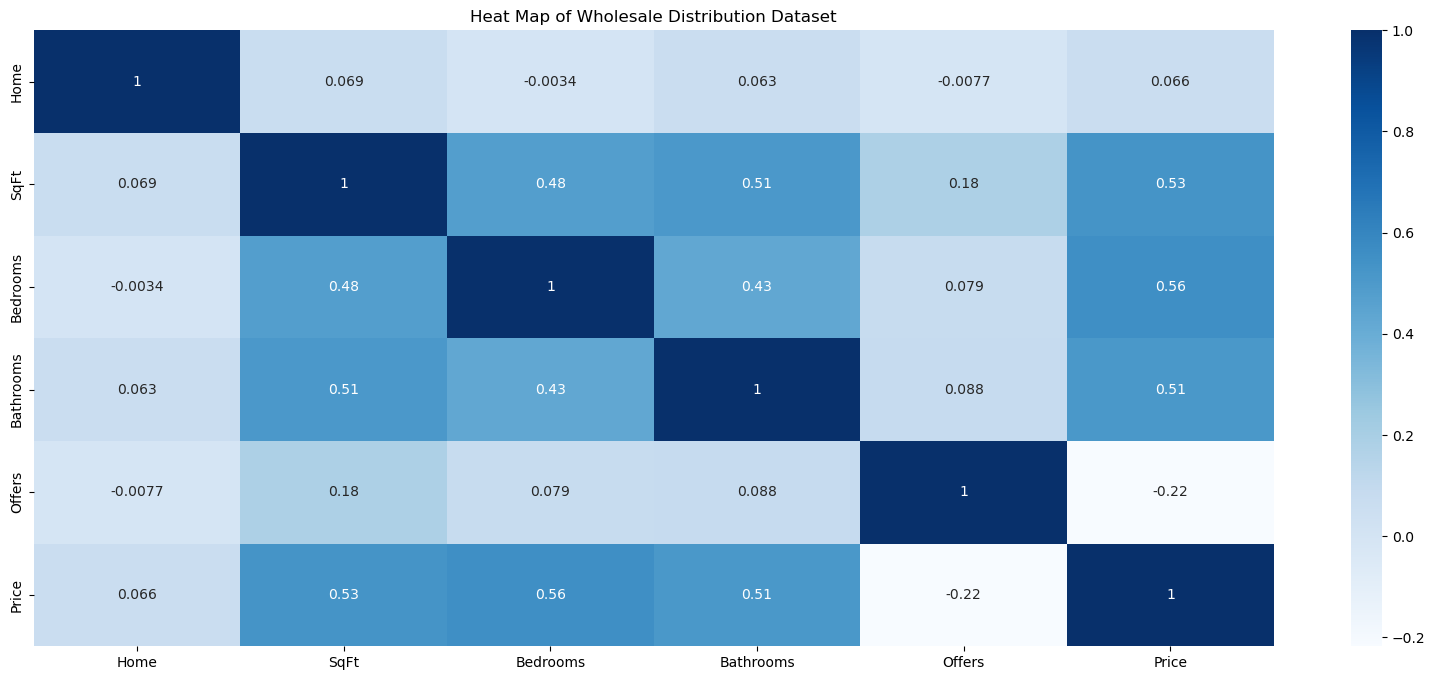

In [9]:
# Using SNS implementing Heatmap inorder to check Corelation amongs Features.

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap="Blues") 
plt.title('Heat Map of Wholesale Distribution Dataset')

# ---------------------------------------------------------------------------------------------------------------

## # Analysing Trends Among the features.

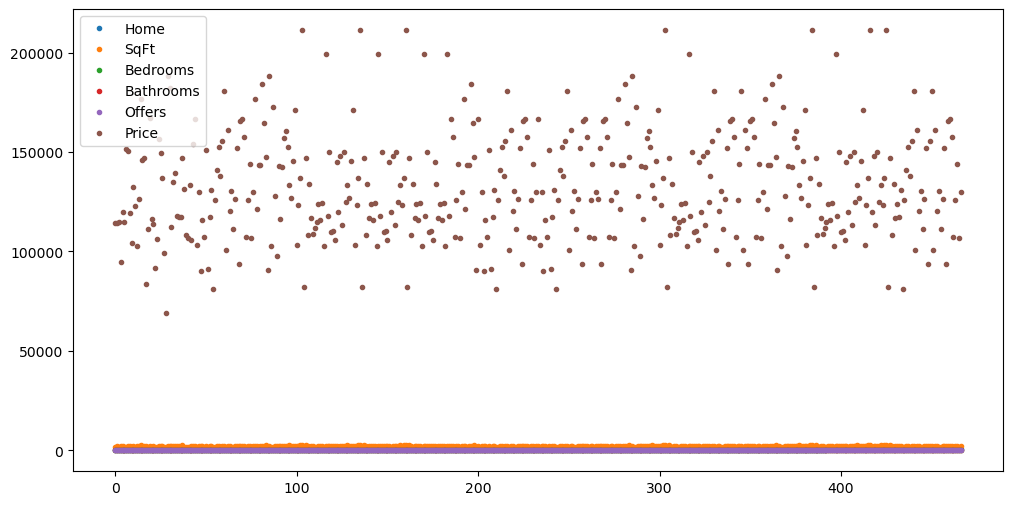

In [10]:
# No obvious trends in the data as sequences
%matplotlib inline
df.plot(figsize=(12,6), style='.');

# ---------------------------------------------------------------------------------------------------------------

In [11]:
df.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1790,2,2,2,East,114300
1,2,2030,4,2,3,East,114200
2,3,1740,3,2,1,East,114800
3,4,1980,3,2,3,East,94700
4,5,2130,3,3,3,East,119800


## # Label Encoding.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
# df["mainroad"] = le.fit_transform(df["mainroad"])
# df["guestroom"] = le.fit_transform(df["guestroom"])
# df["basement"] = le.fit_transform(df["basement"])
# df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])
# df["airconditioning"] = le.fit_transform(df["airconditioning"])
# df["prefarea"] = le.fit_transform(df["prefarea"])
# df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])

In [13]:
df.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1790,2,2,2,0,114300
1,2,2030,4,2,3,0,114200
2,3,1740,3,2,1,0,114800
3,4,1980,3,2,3,0,94700
4,5,2130,3,3,3,0,119800


# ---------------------------------------------------------------------------------------------------------------

## # Implementing K-Fold Cross & Gaussian NB Model.

In [14]:
# Split the data into features (X) and target (y)

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
kfold = KFold(n_splits = 11, shuffle=True, random_state=0)

In [16]:
accuracy_scores = []

In [17]:
for train_index, test_index in kfold.split(x):
    
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = GaussianNB()
    model.fit(x_train, y_train)
      
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)

In [18]:
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy score:", mean_accuracy*100)

Mean accuracy score: 69.78254303835699


In [19]:
print(accuracy_score(y_test, y_pred)*100)

76.19047619047619


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       81300       0.50      1.00      0.67         1
       82300       1.00      1.00      1.00         1
       90300       0.00      0.00      0.00         1
       93600       1.00      1.00      1.00         1
      100900       1.00      1.00      1.00         1
      102500       1.00      0.50      0.67         2
      103200       0.00      0.00      0.00         0
      104000       0.00      0.00      0.00         1
      105600       0.00      0.00      0.00         0
      107300       0.00      0.00      0.00         1
      108200       0.00      0.00      0.00         1
      108500       0.00      0.00      0.00         0
      110400       1.00      1.00      1.00         1
      111100       1.00      1.00      1.00         1
      117000       1.00      1.00      1.00         1
      117800       0.50      1.00      0.67         1
      119700       1.00      0.50      0.67         2
      120500       1.00    

# ---------------------------------------------------------------------------------------------------------------

In [21]:
print(confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


<AxesSubplot:>

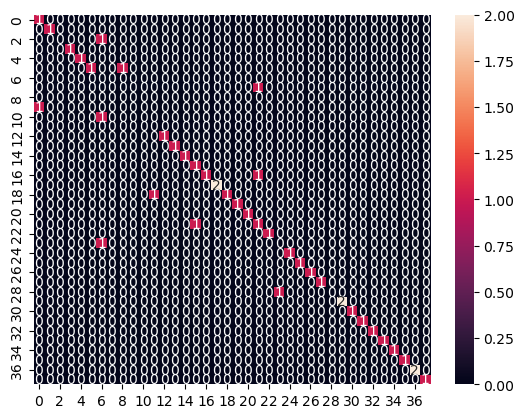

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot =True, fmt='.2g')

# ---------------------------------------------------------------------------------------------------------------

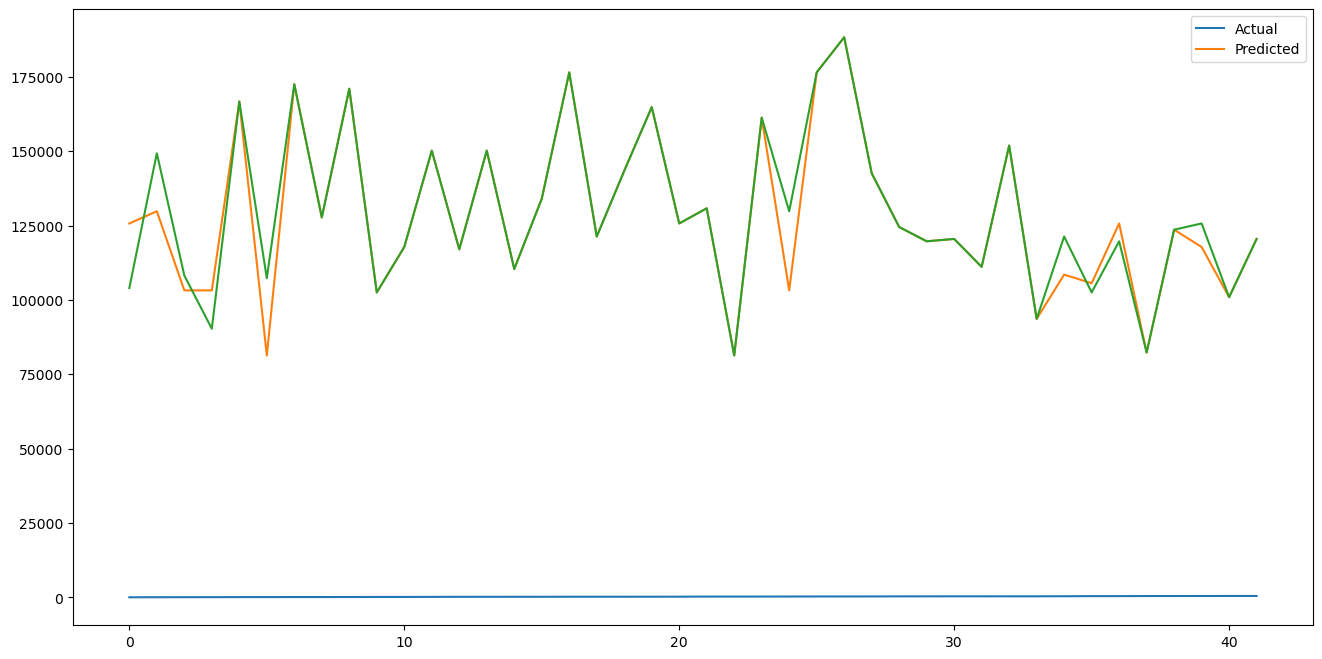

In [23]:
#visualizatation:
test = pd.DataFrame({'Pred_values':y_pred,'Actual':y_test})
fig=plt.figure(figsize=(16,8))
test = test.reset_index()
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

# ---------------------------------------------------------------------------------------------------------------

# # Price Prediction. 

In [24]:
test = pd.read_csv("test_dataset_ori.csv")

In [25]:
test.head()

,home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1930,4,2,3,West,100000
1,2,1678,5,5,4,East,120000
2,3,2903,6,3,2,West,80000
3,4,832,3,2,1,North,76000
4,5,8732,2,1,1,West,135000


## # Label Encoding.

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test["Neighborhood"] = le.fit_transform(test["Neighborhood"])

In [27]:
test = test.drop(['Price'], axis=1)


In [28]:
y_pred = model.predict(test)
y_pred

array([129800, 125700, 129800, 103200, 103200], dtype=int64)

In [29]:
series = pd.Series(y_pred)
series

0    129800
1    125700
2    129800
3    103200
4    103200
dtype: int64

# ---------------------------------------------------------------------------------------------------------------

# # Implement Grid Search CV to find optimal hyperparameters for Following Models LR, SVM, MLP, RF, DTC.

## # ---} Splitting Dataset into 80:10:10 Train, Validation & Test  Dataset Ratio.

In [30]:
# Split the data into features (X) and target (y)

test = pd.read_csv("test_dataset_ori.csv")
test["Neighborhood"] = le.fit_transform(test["Neighborhood"])
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
for train_index, test_index in kfold.split(x):
    
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

In [32]:
# from sklearn.model_selection import train_test_split

In [33]:
# var_x = df.drop('price', axis=1)
# var_y = df['price']

# x_train, x_test, y_train, y_test = train_test_split(var_x, var_y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# ---------------------------------------------------------------------------------------------------------------

# # ----} Logistic Regression Model.

In [34]:
import joblib                                                      # inorder to store models best estimeted data.
import pandas as pd
from sklearn.linear_model import LogisticRegression          
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from time import time



import warnings                                                    # importing warnings so that it won't appear.
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [35]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    mean = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(mean, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [36]:
lr = LogisticRegression()
parameters = {
    'C': [10, 50, 100, 500, 1000]
    
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST Params: {'C': 10}

0.024 (+/-0.033) for {'C': 10}
0.019 (+/-0.028) for {'C': 50}
0.019 (+/-0.028) for {'C': 100}
0.019 (+/-0.028) for {'C': 500}
0.019 (+/-0.028) for {'C': 1000}


In [37]:
cv.best_estimator_

LogisticRegression(C=10)

In [38]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

# ---------------------------------------------------------------------------------------------------------------

# # ----} Random Forest Classifier Model.

In [39]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from time import time

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [40]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    mean = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(mean, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [41]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32]
    
}

cv =GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST Params: {'max_depth': 32, 'n_estimators': 250}

0.127 (+/-0.058) for {'max_depth': 2, 'n_estimators': 5}
0.259 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.289 (+/-0.066) for {'max_depth': 2, 'n_estimators': 250}
0.278 (+/-0.064) for {'max_depth': 4, 'n_estimators': 5}
0.44 (+/-0.193) for {'max_depth': 4, 'n_estimators': 50}
0.468 (+/-0.163) for {'max_depth': 4, 'n_estimators': 250}
0.506 (+/-0.254) for {'max_depth': 8, 'n_estimators': 5}
0.664 (+/-0.269) for {'max_depth': 8, 'n_estimators': 50}
0.661 (+/-0.303) for {'max_depth': 8, 'n_estimators': 250}
0.579 (+/-0.213) for {'max_depth': 16, 'n_estimators': 5}
0.661 (+/-0.345) for {'max_depth': 16, 'n_estimators': 50}
0.68 (+/-0.352) for {'max_depth': 16, 'n_estimators': 250}
0.628 (+/-0.306) for {'max_depth': 32, 'n_estimators': 5}
0.664 (+/-0.358) for {'max_depth': 32, 'n_estimators': 50}
0.692 (+/-0.324) for {'max_depth': 32, 'n_estimators': 250}


In [42]:
cv.best_estimator_                                           # Stores best estimated outcome

RandomForestClassifier(max_depth=32, n_estimators=250)

In [43]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

# ---------------------------------------------------------------------------------------------------------------

# # ----} Support Vector Machine Model.

In [44]:
import joblib
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from time import time

import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [45]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean,std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [46]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST Params: {'C': 10, 'kernel': 'linear'}

0.412 (+/-0.218) for {'C': 0.01, 'kernel': 'linear'}
0.021 (+/-0.009) for {'C': 0.01, 'kernel': 'rbf'}
0.485 (+/-0.219) for {'C': 0.1, 'kernel': 'linear'}
0.021 (+/-0.009) for {'C': 0.1, 'kernel': 'rbf'}
0.668 (+/-0.299) for {'C': 10, 'kernel': 'linear'}
0.059 (+/-0.021) for {'C': 10, 'kernel': 'rbf'}


In [47]:
cv.best_estimator_                                           # Stores best estimated outcome

SVC(C=10, kernel='linear')

In [48]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

# ---------------------------------------------------------------------------------------------------------------

# # ----} Multilayer Perceptron Model.

In [49]:
import joblib
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from time import time

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [50]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean,std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [51]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST Params: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}

0.016 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.016 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.014 (+/-0.027) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.016 (+/-0.019) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.014 (+/-0.018) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.005 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.014 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.014 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.014 (+/-0.018) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learni

In [52]:
cv.best_estimator_                                           # Stores best estimated outcome

MLPClassifier(activation='tanh', hidden_layer_sizes=(10,))

In [53]:
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

['MLP_model.pkl']

# ---------------------------------------------------------------------------------------------------------------

# # ----} Boosting Model.

In [54]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from time import time

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [55]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean,std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [56]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [2, 4, 6, 12],
    'max_depth': [7],
    'learning_rate': [0.01, 0.1, 1, 10]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 4}

0.687 (+/-0.326) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 2}
0.694 (+/-0.302) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 4}
0.701 (+/-0.32) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 6}
0.711 (+/-0.303) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 12}
0.706 (+/-0.297) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 2}
0.72 (+/-0.31) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 4}
0.718 (+/-0.287) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 6}
0.715 (+/-0.307) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 12}
0.718 (+/-0.287) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 2}
0.72 (+/-0.312) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 4}
0.704 (+/-0.26) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 6}
0.706 (+/-0.297) for {'learning_rate': 1, 'max_depth': 7, 'n_est

In [57]:
cv.best_estimator_                                           # Stores best estimated outcome

GradientBoostingClassifier(max_depth=7, n_estimators=4)

In [58]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

# ---------------------------------------------------------------------------------------------------------------

# # Analyzing the results on Test Dataset, in order to do validation.

In [59]:
test.head()

,home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Price
0,1,1930,4,2,3,2,100000
1,2,1678,5,5,4,0,120000
2,3,2903,6,3,2,2,80000
3,4,832,3,2,1,1,76000
4,5,8732,2,1,1,2,135000


In [60]:
# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X = test.iloc[:, :-1]
Y = test.iloc[:, -1]

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, random_state=42)

### ---} Types Of Models & Their Best Result.

In [61]:
models = {}

for mdl in ['LR', 'MLP', 'SVM', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [62]:
models

{'LR': LogisticRegression(C=10),
 'MLP': MLPClassifier(activation='tanh', hidden_layer_sizes=(10,)),
 'SVM': SVC(C=10, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=32, n_estimators=250),
 'GB': GradientBoostingClassifier(max_depth=7, n_estimators=4)}

In [63]:
def evaluate_model(name, model, x, y):
    start = time()
    pred = model.predict(x)
    end = time()
    
    accuracy = round(accuracy_score(y, pred), 3)
    precision = round(precision_score(y, pred, average = 'weighted'), 3)
    recall = round(recall_score(y, pred, average = 'weighted'), 3)
    
    print('{} -- Accuracy: {} / precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, end - start))

In [64]:
for name, mdl in models.items():
    evaluate_model(name, mdl, x_train, y_train) 

LR -- Accuracy: 0.038 / precision: 0.006 / Recall: 0.038 / Latency: 0.0ms
MLP -- Accuracy: 0.024 / precision: 0.002 / Recall: 0.024 / Latency: 0.0ms
SVM -- Accuracy: 0.984 / precision: 0.986 / Recall: 0.984 / Latency: 0.04174470901489258ms
RF -- Accuracy: 1.0 / precision: 1.0 / Recall: 1.0 / Latency: 0.03621721267700195ms
GB -- Accuracy: 1.0 / precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
